In [259]:
import sys
import os

print(sys.path)


['/gdrive/public/DATA/Human_Data/LB3_PIONEER/LB3_processing/ieeg_features/code/tools/', './tools/', './tools/', '/gdrive/public/DATA/Human_Data/LB3_PIONEER/LB3_processing/ieeg_features/code/tools/', './tools/', './tools/', './tools/', './tools/', './tools/', './tools/', './tools/', '/mnt/borel/gdrive/public/USERS/igvilla', '/home1/i/igvilla/.conda/envs/ieegpy-projects/lib/python37.zip', '/home1/i/igvilla/.conda/envs/ieegpy-projects/lib/python3.7', '/home1/i/igvilla/.conda/envs/ieegpy-projects/lib/python3.7/lib-dynload', '', '/home1/i/igvilla/.conda/envs/ieegpy-projects/lib/python3.7/site-packages', '/home1/i/igvilla/.conda/envs/ieegpy-projects/lib/python3.7/site-packages/IPython/extensions', '/mnt/castor/seas_home/i/igvilla/.ipython']


In [260]:
# insert the path for the files
path_to_LB3_pioneer = "/gdrive/public/DATA/Human_Data/LB3_PIONEER/LB3_processing/ieeg_features/code/tools/"

In [261]:
sys.path.insert(0, path_to_LB3_pioneer)
import helpers
import tools
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt, butter
import importlib
import sys
import os
sys.path.insert(1, os.path.join("./tools/"))

# reload library
importlib.reload(sys.modules['helpers'])
from helpers import *

from tools import get_iEEG_data
from get_iEEG_data import *

In [262]:
%load_ext autoreload
%autoreload 2
# the 2 above lines of code are for reimporting/reloading module to python code, in order to avoid errors & make sure everything is updated correctly (including functions)

import sys
import os
sys.path.insert(1, os.path.join("./tools/"))
from helpers import *

# reload library
importlib.reload(sys.modules['helpers'])
from helpers import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


________
________
________

# *** *** *** FINAL CLASS & FUNCTION FOR BOTH PREPROCESSING & FEATURE SELECTION

________
________
________

_____________
_____________
_____________

# STEP 1 for the Final Class/Function/Pipeline created (most simplified version)

## Loading in the CSV file of all listed subjects to conduct research on:
### + save all subject names + save all files of data to be used for each patient

In [263]:
ieeg_metadata_converted_sz_times = pd.read_csv(r'/gdrive/public/DATA/Human_Data/LB3_PIONEER/LB3_processing/ieeg_features/data/ieeg_metadata_converted_sz_times.csv')

# ieeg_metadata_converted_sz_times

In [264]:
subject_names = np.unique(ieeg_metadata_converted_sz_times['LB3_id']).tolist()

subject_names

['LB3_001_phaseII', 'LB3_002_phaseI', 'LB3_004_phaseI', 'LB3_005_phaseII']

In [265]:
from os import listdir
from os.path import isfile, join

nl = '\n'
files_allSubjects = []
for i in subject_names:
    onlyfiles = [f for f in listdir(f"/gdrive/public/DATA/Human_Data/LB3_PIONEER/{i}/wearables/pre-processed/") if isfile(join(f"/gdrive/public/DATA/Human_Data/LB3_PIONEER/{i}/wearables/pre-processed/", f))]
    files_allSubjects.append(onlyfiles)
    print(f"Subject Name: {i}{nl} Files for Subject: {onlyfiles}{nl}{nl}")

Subject Name: LB3_001_phaseII
 Files for Subject: ['ecg_heart.h5', 'watch_heart.h5', 'watch_sleep.h5']


Subject Name: LB3_002_phaseI
 Files for Subject: ['watch_heart.h5', 'ecg_heart.h5', 'watch_sleep.h5']


Subject Name: LB3_004_phaseI
 Files for Subject: ['watch_acc.h5', 'watch_heart.h5', 'watch_sleep.h5', 'ec_heart.h5', 'ec2_heart.h5', 'ecg_heart.h5']


Subject Name: LB3_005_phaseII
 Files for Subject: ['.DS_Store', '._.DS_Store', 'watch_acc.h5', 'watch_heart.h5', 'watch_sleep.h5', 'ec_heart.h5', 'ec1_heart.h5', 'ecg_heart.h5']




In [266]:
files_allSubjects

[['ecg_heart.h5', 'watch_heart.h5', 'watch_sleep.h5'],
 ['watch_heart.h5', 'ecg_heart.h5', 'watch_sleep.h5'],
 ['watch_acc.h5',
  'watch_heart.h5',
  'watch_sleep.h5',
  'ec_heart.h5',
  'ec2_heart.h5',
  'ecg_heart.h5'],
 ['.DS_Store',
  '._.DS_Store',
  'watch_acc.h5',
  'watch_heart.h5',
  'watch_sleep.h5',
  'ec_heart.h5',
  'ec1_heart.h5',
  'ecg_heart.h5']]

In [267]:
len(subject_names) == len(files_allSubjects)

True

_______
_______
_______

# STEP 2

--> NOW, try to do all these steps in just a few lines of code

--> after this step check for if there is high/strong correlation between features, and if so, either delete some feature or perform PCA (PCA has its own downsides...)

--> after that, perform standardization/scaling with StandardScaler()

In [268]:
from tools import pipeline_preprocesing_and_featureSelection_v2
from pipeline_preprocesing_and_featureSelection_v2 import pipeline_preprocessing_and_featureSelection_v2

preprocess_feature_class = pipeline_preprocessing_and_featureSelection_v2(subject_names, files_allSubjects, '30s')

featSets_allSubjects = preprocess_feature_class.preprocessing_and_featureSelection()


['ecg_heart.h5']
['watch_heart.h5']
['ecg_heart.h5']
['watch_heart.h5']
['ecg_heart.h5']
['watch_heart.h5']
['watch_acc.h5']
['ecg_heart.h5']
['watch_heart.h5']
['watch_acc.h5']


In [269]:
# Commented out due to IRB...

# for i in range(len(subject_names)):
#     print(subject_names[i])
#     display(featSets_allSubjects[i])

# STEP 3: check for correlation between features

* if strong (almost perfect) correlation is found among features, either:

    - A: perform PCA to avoid multicollinearity, using one of the 2 options as a way of making sure to maintain original variance of features:
        - (1) pca.explained_variance_ratio_ as a way of checking what number of principal components will maintain close to all original variance from the feature set 
        - (2) set n_components for PCA to "mle", which will use Minka's Maximum-Likelihood Estimation as a way of guessing/estimating the best number of principal components for maintaining variance 
            - PCA(n_components = "mle", svd_solver ="full")
        - this should be followed by later on being able to trace back the features associated with the final clusters and their principal components, since this will allow us to associate something such as low/high HR or low/high accelerometry with resulting clusters from created models

    - B: delete a feature that is highly correlated to another, if it seems like it will not cause much harm to the feature set & is instead uselessly redundant 

In [270]:
# 0 1 2 3

featSet_001 = featSets_allSubjects[0]
featSet_002 = featSets_allSubjects[1]
featSet_004 = featSets_allSubjects[2]
featSet_005 = featSets_allSubjects[3]


corr_matrix_001 = featSet_001.corr()

corr_matrix_002 = featSet_002.corr()

corr_matrix_004 = featSet_004.corr()

corr_matrix_005 = featSet_005.corr()

In [271]:
display(corr_matrix_001)
display(corr_matrix_002)
display(corr_matrix_004)
display(corr_matrix_005)

,ECG_HR,Watch_HR,Ratio_ECG_to_Watch_HR,Derivative_ECG_HR,Derivative_Watch_HR,Ratio_ecgDeriv_to_watchHRderiv
ECG_HR,1.000000e+00,7.032753e-01,0.351316,2.213768e-17,6.746390e-02,-9.612239e-04
Watch_HR,7.032753e-01,1.000000e+00,-0.386005,-5.444887e-02,5.995499e-18,1.063552e-02
Ratio_ECG_to_Watch_HR,3.513156e-01,-3.860048e-01,1.000000,8.639358e-02,9.810706e-02,-9.078543e-03
Derivative_ECG_HR,2.213768e-17,-5.444887e-02,0.086394,1.000000e+00,3.720014e-01,-7.294265e-03
Derivative_Watch_HR,6.746390e-02,5.995499e-18,0.098107,3.720014e-01,1.000000e+00,-7.384010e-21
Ratio_ecgDeriv_to_watchHRderiv,-9.612239e-04,1.063552e-02,-0.009079,-7.294265e-03,-7.384010e-21,1.000000e+00


,ECG_HR,Watch_HR,Ratio_ECG_to_Watch_HR,Derivative_ECG_HR,Derivative_Watch_HR,Ratio_ecgDeriv_to_watchHRderiv
ECG_HR,1.000000e+00,5.328622e-01,0.532649,-6.566248e-18,-5.672559e-02,8.468715e-03
Watch_HR,5.328622e-01,1.000000e+00,-0.418731,3.338482e-02,4.312262e-18,5.091742e-03
Ratio_ECG_to_Watch_HR,5.326487e-01,-4.187315e-01,1.000000,-3.737627e-02,-6.324593e-02,2.968394e-03
Derivative_ECG_HR,-6.566248e-18,3.338482e-02,-0.037376,1.000000e+00,-5.232922e-02,8.744457e-03
Derivative_Watch_HR,-5.672559e-02,4.312262e-18,-0.063246,-5.232922e-02,1.000000e+00,1.901080e-20
Ratio_ecgDeriv_to_watchHRderiv,8.468715e-03,5.091742e-03,0.002968,8.744457e-03,1.901080e-20,1.000000e+00


,ECG_HR,Watch_Acc_X,Watch_Acc_Y,Watch_Acc_Z,Watch_Acc_Magnitude,Derivative_ECG_HR,Ratio_ECG_to_watchAccMag,Ratio_AccX_to_AccY,Ratio_AccX_to_AccZ,Ratio_AccY_to_AccZ,Derivative_Watch_Acc_Mag,Ratio_ecgDeriv_to_watchAccDeriv,Derivative_Acc_X,Derivative_Acc_Y,Derivative_Acc_Z,Ratio_DerivAccX_to_DerivAccY,Ratio_DerivAccX_to_DerivAccZ,Ratio_DerivAccY_to_DerivAccZ
ECG_HR,1.000000e+00,-1.949088e-01,1.137875e-01,-2.278136e-01,1.608285e-01,-2.396755e-19,0.994408,0.000966,-0.002789,0.003436,-1.773613e-02,-5.807903e-04,-1.835742e-03,-3.506451e-03,-3.707781e-03,-7.535452e-03,8.143516e-03,8.830846e-03
Watch_Acc_X,-1.949088e-01,1.000000e+00,-1.670680e-02,1.508763e-02,1.393066e-01,1.303979e-03,-0.211850,0.017868,0.000802,-0.001715,-4.188524e-03,-1.008513e-02,5.088882e-18,3.075699e-03,3.210595e-04,9.488270e-03,1.305350e-03,-9.911036e-03
Watch_Acc_Y,1.137875e-01,-1.670680e-02,1.000000e+00,-2.633847e-01,1.410996e-01,3.574374e-03,0.099838,0.000477,-0.002458,-0.014623,1.670566e-03,-1.144371e-02,-4.413844e-03,-2.391885e-19,5.206314e-03,3.536267e-03,1.156795e-02,6.678248e-03
Watch_Acc_Z,-2.278136e-01,1.508763e-02,-2.633847e-01,1.000000e+00,1.785983e-02,2.994547e-03,-0.232641,-0.006177,0.002895,-0.004917,5.939475e-03,6.480804e-03,-3.650426e-04,-4.124917e-03,-3.948104e-18,-4.820992e-03,-8.766328e-03,-1.575821e-03
Watch_Acc_Magnitude,1.608285e-01,1.393066e-01,1.410996e-01,1.785983e-02,1.000000e+00,3.660915e-02,0.056481,0.005209,0.001812,-0.004344,1.899306e-16,-1.266547e-04,1.217118e-02,-3.382689e-03,-1.517965e-02,-7.937486e-03,-4.754257e-04,-1.877710e-03
Derivative_ECG_HR,-2.396755e-19,1.303979e-03,3.574374e-03,2.994547e-03,3.660915e-02,1.000000e+00,-0.003527,-0.003536,-0.005846,0.005008,4.818877e-02,2.084357e-03,-8.753758e-03,-3.966796e-03,-1.585661e-02,-6.045702e-03,-1.016529e-02,-2.353065e-03
Ratio_ECG_to_watchAccMag,9.944075e-01,-2.118499e-01,9.983758e-02,-2.326406e-01,5.648056e-02,-3.527466e-03,1.000000,0.000434,-0.003030,0.003966,-1.842295e-02,-5.207364e-04,-3.321081e-03,-3.002942e-03,-2.153017e-03,-6.749139e-03,8.246274e-03,9.164566e-03
Ratio_AccX_to_AccY,9.661386e-04,1.786759e-02,4.773925e-04,-6.176527e-03,5.209498e-03,-3.535646e-03,0.000434,1.000000,0.001188,-0.000072,-9.912556e-04,-4.044578e-04,-4.939427e-04,-7.539283e-04,2.813500e-04,-3.754758e-04,-1.396625e-04,-7.623236e-05
Ratio_AccX_to_AccZ,-2.788644e-03,8.022290e-04,-2.457629e-03,2.894683e-03,1.811904e-03,-5.845953e-03,-0.003030,0.001188,1.000000,0.658620,9.995710e-05,1.375261e-04,-3.577246e-03,-5.937336e-03,-7.921871e-03,4.595538e-04,-1.132642e-03,3.560650e-05
Ratio_AccY_to_AccZ,3.435689e-03,-1.714753e-03,-1.462299e-02,-4.916587e-03,-4.344390e-03,5.008129e-03,0.003966,-0.000072,0.658620,1.000000,6.508484e-03,6.823311e-05,3.573150e-03,7.332424e-05,1.658796e-03,3.762055e-04,7.930341e-04,2.049038e-04


,ECG_HR,Watch_Acc_X,Watch_Acc_Y,Watch_Acc_Z,Watch_Acc_Magnitude,Derivative_ECG_HR,Ratio_ECG_to_watchAccMag,Ratio_AccX_to_AccY,Ratio_AccX_to_AccZ,Ratio_AccY_to_AccZ,Derivative_Watch_Acc_Mag,Ratio_ecgDeriv_to_watchAccDeriv,Derivative_Acc_X,Derivative_Acc_Y,Derivative_Acc_Z,Ratio_DerivAccX_to_DerivAccY,Ratio_DerivAccX_to_DerivAccZ,Ratio_DerivAccY_to_DerivAccZ
ECG_HR,1.000000e+00,4.326414e-02,7.517937e-02,2.611211e-01,3.804500e-01,-3.775573e-18,0.999128,-0.006830,0.001473,0.003190,-2.443310e-02,4.232819e-03,1.144732e-02,1.406801e-02,-2.373527e-04,-7.526311e-03,-3.906400e-04,-5.706727e-03
Watch_Acc_X,4.326414e-02,1.000000e+00,6.635189e-02,1.721887e-01,2.189176e-01,-1.319019e-02,0.036529,0.011758,0.009665,0.009724,-5.953085e-03,-7.136111e-03,6.742712e-18,-1.611317e-04,-2.225201e-03,6.484151e-03,-4.716841e-03,4.456885e-03
Watch_Acc_Y,7.517937e-02,6.635189e-02,1.000000e+00,3.937049e-01,1.533345e-01,-1.931840e-02,0.070738,-0.002052,0.000994,0.000011,7.343891e-03,-3.171972e-03,1.920313e-04,9.357338e-19,1.662142e-02,3.029270e-03,-1.323571e-03,-2.958812e-03
Watch_Acc_Z,2.611211e-01,1.721887e-01,3.937049e-01,1.000000e+00,3.516725e-01,2.654933e-04,0.251019,-0.009412,0.008472,0.010946,3.679362e-03,-3.288888e-03,2.160138e-03,-1.353909e-02,-1.537316e-18,-6.053141e-03,-6.675280e-03,-8.710158e-03
Watch_Acc_Magnitude,3.804500e-01,2.189176e-01,1.533345e-01,3.516725e-01,1.000000e+00,4.836681e-02,0.342001,0.006144,0.003925,0.005556,-1.953832e-16,-3.092561e-03,1.022737e-02,-1.058661e-02,-6.511514e-03,1.433722e-03,5.009497e-03,-8.402815e-03
Derivative_ECG_HR,-3.775573e-18,-1.319019e-02,-1.931840e-02,2.654933e-04,4.836681e-02,1.000000e+00,-0.002114,-0.007168,0.000358,0.001223,1.032592e-01,5.130176e-03,-2.429949e-02,-5.475551e-02,-1.055855e-02,4.559729e-03,2.194817e-03,6.335227e-03
Ratio_ECG_to_watchAccMag,9.991275e-01,3.652912e-02,7.073842e-02,2.510187e-01,3.420011e-01,-2.113705e-03,1.000000,-0.007200,0.001353,0.003020,-2.484553e-02,4.438782e-03,1.097424e-02,1.473234e-02,8.383486e-05,-7.720030e-03,-6.391727e-04,-5.422583e-03
Ratio_AccX_to_AccY,-6.830362e-03,1.175788e-02,-2.052388e-03,-9.412445e-03,6.143525e-03,-7.167863e-03,-0.007200,1.000000,0.000215,0.000178,-9.806128e-03,6.057258e-04,-3.109835e-03,-1.531447e-02,-1.000356e-02,-2.485136e-05,1.629652e-05,8.536076e-04
Ratio_AccX_to_AccZ,1.473139e-03,9.664503e-03,9.944625e-04,8.472269e-03,3.924770e-03,3.578968e-04,0.001353,0.000215,1.000000,0.985709,6.336296e-03,1.919486e-05,9.539460e-03,-3.820370e-05,-3.100382e-03,-2.861785e-04,-1.133167e-04,-6.281121e-05
Ratio_AccY_to_AccZ,3.189949e-03,9.723516e-03,1.123105e-05,1.094579e-02,5.556441e-03,1.222829e-03,0.003020,0.000178,0.985709,1.000000,6.051177e-03,6.199628e-05,1.081433e-02,1.615272e-03,-2.030649e-03,-4.609032e-04,-1.432202e-04,-6.848048e-05


#### --> in this case, for a quicker & simpler method, will delete the feature 'Ratio_ECG_to_watchAccMag' for LB3_004 & LB3_005, since it is highly correlated to 'ECG_HR' in these 2 subjects alone...


#### --> in the future, when creating it all into one Pipeline, PCA will likely be performed instead of deleting one of the highly correlated features...

In [272]:
featSet_004.drop('Ratio_ECG_to_watchAccMag', axis=1, inplace=True)
featSet_005.drop('Ratio_ECG_to_watchAccMag', axis=1, inplace=True)

featSets = [featSet_001, featSet_002, featSet_004, featSet_005]

# display(featSets)

### NOW, we have checked for high correlation between features & deleted ONE of them that is highly correlated to ECG_HR (avoided PCA so that signal features like HR & accelerometer can stay being possible to relate to the final clusters...)

### --> NEXT STEP: standardization & scaling...

... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... 

# STEP 4: Perform Standardization (standard scaler)

In [273]:
from sklearn.preprocessing import StandardScaler

# perform standardization on the entire feature set (excluding the column of timeStamps, the only column not representing a feature)
scaler_001 = StandardScaler().fit(featSet_001.loc[:, featSet_001.columns != 'timeStamp'])
scaler_002 = StandardScaler().fit(featSet_002.loc[:, featSet_002.columns != 'timeStamp'])
scaler_004 = StandardScaler().fit(featSet_004.loc[:, featSet_004.columns != 'timeStamp'])
scaler_005 = StandardScaler().fit(featSet_005.loc[:, featSet_005.columns != 'timeStamp'])

normFeatSet_001 = scaler_001.transform(featSet_001.loc[:, featSet_001.columns != 'timeStamp'])
normFeatSet_002 = scaler_002.transform(featSet_002.loc[:, featSet_002.columns != 'timeStamp'])
normFeatSet_004 = scaler_004.transform(featSet_004.loc[:, featSet_004.columns != 'timeStamp'])
normFeatSet_005 = scaler_005.transform(featSet_005.loc[:, featSet_005.columns != 'timeStamp'])

# create a Pandas Dataframe of the resulting output from the StandardScaler() operation
final_normFeatSet_001_df = pd.DataFrame(normFeatSet_001, columns = featSet_001.loc[:, featSet_001.columns != 'timeStamp'].columns)
final_normFeatSet_002_df = pd.DataFrame(normFeatSet_002, columns = featSet_002.loc[:, featSet_002.columns != 'timeStamp'].columns)
final_normFeatSet_004_df = pd.DataFrame(normFeatSet_004, columns = featSet_004.loc[:, featSet_004.columns != 'timeStamp'].columns)
final_normFeatSet_005_df = pd.DataFrame(normFeatSet_005, columns = featSet_005.loc[:, featSet_005.columns != 'timeStamp'].columns)

# add the timeStamps back into the Dataframe
final_normFeatSet_001_df['timeStamp'] = featSet_001['timeStamp']
final_normFeatSet_002_df['timeStamp'] = featSet_002['timeStamp']
final_normFeatSet_004_df['timeStamp'] = featSet_004['timeStamp']
final_normFeatSet_005_df['timeStamp'] = featSet_005['timeStamp']


In [274]:
final_featSets = [final_normFeatSet_001_df, final_normFeatSet_002_df, final_normFeatSet_004_df, final_normFeatSet_005_df]

# Commented out due to IRB...

# for i in range(len(final_featSets)):
#     print(subject_names[i])
#     display(final_featSets[i])

_______
_______
_______
_______
_______
_______

_______
_______
_______
_______
_______
_______

_______
_______
_______
_______
_______
_______

_________
_________
_________

# *** Continuing on with training unsupervised learning clustering models (for each patient):

... ... ...

## First, let's visualize the dataset of features in just 2 dimensions (for each patient):

In [275]:
from sklearn.manifold import TSNE 

# excluding ONLY the column of timeStamps

featSet_001_2D = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])

featSet_002_2D = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])

featSet_004_2D = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])

featSet_005_2D = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])


In [276]:
featSet_001_2D_plot = np.transpose(featSet_001_2D)

featSet_002_2D_plot = np.transpose(featSet_002_2D)

featSet_004_2D_plot = np.transpose(featSet_004_2D)

featSet_005_2D_plot = np.transpose(featSet_005_2D)


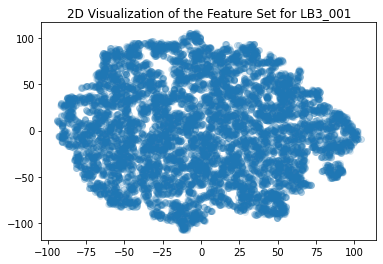

In [277]:
plt.scatter(featSet_001_2D_plot[0], featSet_001_2D_plot[1], alpha=0.1)
plt.title('2D Visualization of the Feature Set for LB3_001')


plt.show()

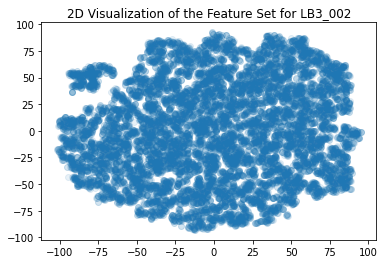

In [278]:
plt.scatter(featSet_002_2D_plot[0], featSet_002_2D_plot[1], alpha=0.1)
plt.title('2D Visualization of the Feature Set for LB3_002')


plt.show()

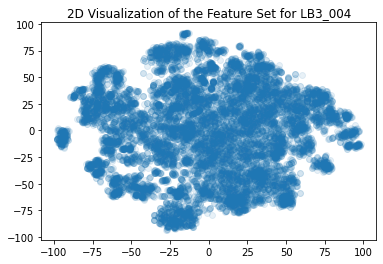

In [279]:
plt.scatter(featSet_004_2D_plot[0], featSet_004_2D_plot[1], alpha=0.1)
plt.title('2D Visualization of the Feature Set for LB3_004')


plt.show()

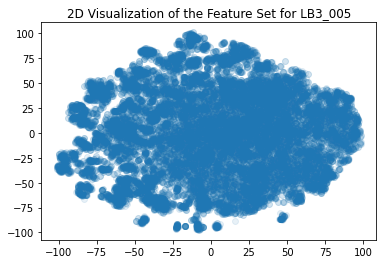

In [280]:
plt.scatter(featSet_005_2D_plot[0], featSet_005_2D_plot[1], alpha=0.1)
plt.title('2D Visualization of the Feature Set for LB3_005')


plt.show()

... ... ...

## Now, let's train different models for each patient (patient-specific models):

__________________
__________________

# LB3_001

__________________
__________________

# *** KMeans - LB3_001

In [281]:
from sklearn.cluster import KMeans 

# increase n_init ro increase the number of times the k-means algorithm will be run with different centroid seeds 
# increase max_iter to increase the maximum number of iterations for the k-means algorithm on a single run (a.k.a. increase the number of times it updates the centroid for cconvergence)

kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans5 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans6 = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans7 = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans8 = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans9 = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans10 = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans11 = KMeans(n_clusters=11, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans12 = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans13 = KMeans(n_clusters=13, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans14 = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans15 = KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=300, random_state=0)

* fit + predict for LB3_001

In [282]:
# final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']

y_pred2 = kmeans2.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred3 = kmeans3.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred4 = kmeans4.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred5 = kmeans5.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred6 = kmeans6.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred7 = kmeans7.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred8 = kmeans8.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred9 = kmeans9.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred10 = kmeans10.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred11 = kmeans11.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred12 = kmeans12.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred13 = kmeans13.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred14 = kmeans14.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
y_pred15 = kmeans15.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])

* find the optimal number of clusters for KMeans

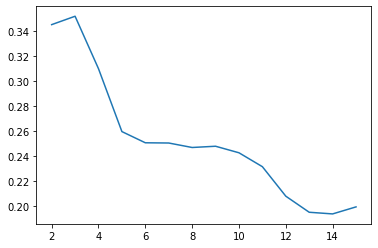

In [283]:
# silhouette scores...

from sklearn.metrics import silhouette_score

sil_score2 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans2.labels_)
sil_score3 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans3.labels_)
sil_score4 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans4.labels_)
sil_score5 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans5.labels_)
sil_score6 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans6.labels_)
sil_score7 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans7.labels_)
sil_score8 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans8.labels_)
sil_score9 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans9.labels_)
sil_score10 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans10.labels_)
sil_score11 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans11.labels_)
sil_score12 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans12.labels_)
sil_score13 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans13.labels_)
sil_score14 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans14.labels_)
sil_score15 = silhouette_score(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], kmeans15.labels_)


num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
all_sil_scores = [sil_score2, sil_score3, sil_score4, sil_score5, sil_score6, sil_score7, sil_score8, sil_score9, sil_score10, 
sil_score11, sil_score12, sil_score13, sil_score14, sil_score15]

plt.plot(num_clusters, all_sil_scores)


plt.show()

In [284]:
print(sil_score2)
print(sil_score3)

0.34488911930458366
0.3516001943192275


... ... ...

--> 3 is the optimal number of clusters !!!

... ... ...

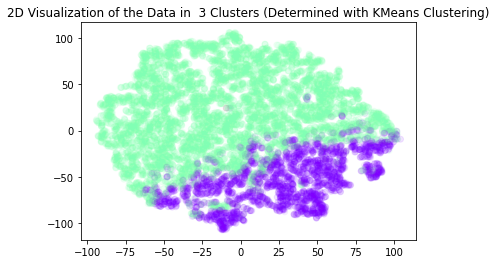

In [285]:


plt.scatter(featSet_001_2D_plot[0], featSet_001_2D_plot[1], c = kmeans3.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(kmeans3.labels_))} Clusters (Determined with KMeans Clustering)")



plt.show()


______
______

# *** Hierarchial Agglomerative Clustering - LB3_001

- likely the best methods for testing for similarity are:
    - Group Average
    - Ward's Method
    - distance between centroids

... ... 

- good way to handle noise/outliers in the data:
    - use a threshold to determine the termination criterion (ensuring to not generate clusters that are too small)

In [286]:
from sklearn.cluster import AgglomerativeClustering

agg_hier_clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])     
# defaults to result with ONE final cluster...



- let's check the dendrogram in order to find the optimal number of clusters...

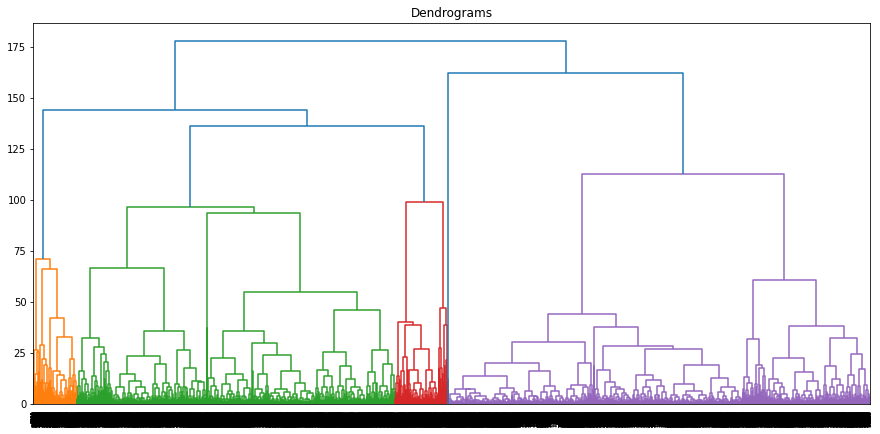

In [287]:
import scipy.cluster.hierarchy as shc 
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(15,7))
pyplot.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'], method='ward'))


plt.show()

In [288]:
# search for unique colors in the color list for the dendrogram...

unique_colors = set(dend['color_list'])
print(unique_colors)

optimal_num_clusters = len(unique_colors) - 1

optimal_num_clusters

{'C2', 'C0', 'C4', 'C1', 'C3'}


4

--> optimal number of clusters seems to be 4 (although one of those clusters seems to be very small, and is likely just noise...)

In [289]:
agglomerative_clustering_4 = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')   
# agglomerative_clustering_3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')   # defaults to result with ONE final cluster...


# cluster the data:
agglomerative_clustering_4.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...
# agglomerative_clustering_3.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...

array([0, 0, 0, ..., 0, 0, 0])

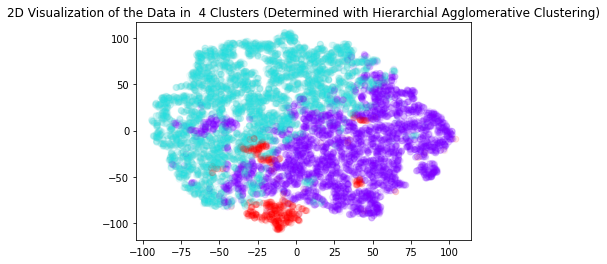

In [290]:
plt.scatter(featSet_001_2D_plot[0], featSet_001_2D_plot[1], c = agglomerative_clustering_4.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(agglomerative_clustering_4.labels_))} Clusters (Determined with Hierarchial Agglomerative Clustering)")



plt.show()

_______
_______

# *** Gaussian Mixture Models - LB3_001

- similar to KMeans, but better...
- unlike KMeans, this uses SOFT cluster assignments 
    - estimating probability of it belonging to each cluster
    - then, during the maximization step, each cluster is updated using ALL instances, with each instance weighted by the estimated probability that it belongs to said cluster  
- this model finds more complex patterns in the data, is not as simple, and results in very different clustering results
    - finds more complex & not so simple patterns in data, due to its soft clustering, with not such rigid divisions between clusters (which is the case for KMeans); clustersd can even overlap a bit

In [291]:
from sklearn.mixture import GaussianMixture

# n_init = number of times it runs in order to make sure it converges to good solutions (set to 10, or possibly more...)

# create different Gaussian Mixture models, with differnet number of clusters...
gm2 = GaussianMixture(n_components = 2, n_init = 10)    # init_params = 'k-means++'
gm3 = GaussianMixture(n_components = 3, n_init = 10)    # init_params = 'k-means++'
gm4 = GaussianMixture(n_components = 4, n_init = 10)    # init_params = 'k-means++'    
gm5 = GaussianMixture(n_components = 5, n_init = 10)    # init_params = 'k-means++'    
gm6 = GaussianMixture(n_components = 6, n_init = 10)    # init_params = 'k-means++'
gm7 = GaussianMixture(n_components = 7, n_init = 10)    # init_params = 'k-means++'
gm8 = GaussianMixture(n_components = 8, n_init = 10)    # init_params = 'k-means++'    
gm9 = GaussianMixture(n_components = 9, n_init = 10)    # init_params = 'k-means++'  
gm10 = GaussianMixture(n_components = 10, n_init = 10)    # init_params = 'k-means++'      
gm11 = GaussianMixture(n_components = 11, n_init = 10)    # init_params = 'k-means++'      
gm12 = GaussianMixture(n_components = 12, n_init = 10)    # init_params = 'k-means++'      
gm13 = GaussianMixture(n_components = 13, n_init = 10)    # init_params = 'k-means++'      
gm14 = GaussianMixture(n_components = 14, n_init = 10)    # init_params = 'k-means++'      
gm15 = GaussianMixture(n_components = 15, n_init = 10)    # init_params = 'k-means++'      


### FIT TO EACH OF THE CREATED GAUSSIAN MIXTURE MODELS:

gm2.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm3.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm4.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm5.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm6.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm7.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm8.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm9.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm10.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm11.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm12.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm13.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm14.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm15.fit(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])



GaussianMixture(n_components=15, n_init=10)

In [292]:
gm2_clusters = gm2.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm3_clusters = gm3.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm4_clusters = gm4.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm5_clusters = gm5.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm6_clusters = gm6.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm7_clusters = gm7.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm8_clusters = gm8.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm9_clusters = gm9.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm10_clusters = gm10.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm11_clusters = gm11.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm12_clusters = gm12.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm13_clusters = gm13.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm14_clusters = gm14.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])
gm15_clusters = gm15.predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])


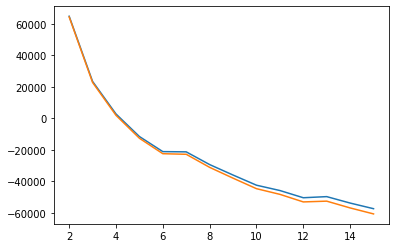

In [293]:
bic_scores = [gm2.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm3.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm4.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm5.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm6.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm7.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm8.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm9.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm10.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm11.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm12.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm13.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm14.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm15.bic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])]

aic_scores = [gm2.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm3.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm4.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']), 
gm5.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm6.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm7.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm8.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm9.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm10.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm11.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm12.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm13.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm14.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']),
gm15.aic(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])]

num_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(num_clusters, bic_scores)
plt.plot(num_clusters, aic_scores)

plt.show()

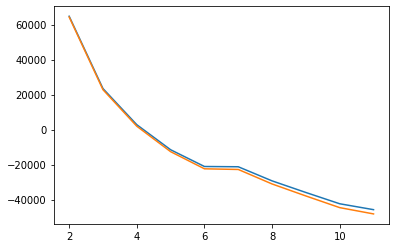

In [294]:
plt.plot(num_clusters[:10], bic_scores[:10])
plt.plot(num_clusters[:10], aic_scores[:10])

plt.show()

### --> elbow (slightly) spotted at 3 clusters

### --> plateau spotted at 6 clusters (more slight elbows at all points between 3 & 8 clusters)

### --> *** look for where the gradient of the BIC scores become almost constant (plateaus) & choose the number of clusters right before it plateaus

In [295]:
array_bic = np.array(bic_scores)
array_aic = np.array(aic_scores)

gradient_bic = np.gradient(array_bic)
gradient_aic = np.gradient(array_aic)



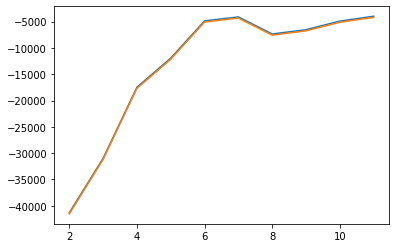

In [296]:
plt.plot(num_clusters[:10], gradient_bic[:10])
plt.plot(num_clusters[:10], gradient_aic[:10])

plt.show()

### at 6 the gradient becomes constant (plateau), i.e. there is no much gain in increasing the number of clusters 

### --> suggests to use 5 as the optimal number of clusters (one less than where the gradient becomes constant)

https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

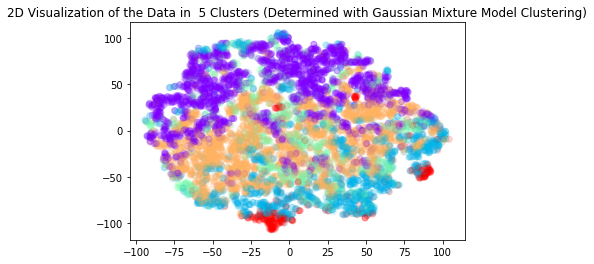

In [297]:
plt.scatter(featSet_001_2D_plot[0], featSet_001_2D_plot[1], c = gm5_clusters, cmap='rainbow', alpha = 0.08)
plt.title(f"2D Visualization of the Data in  {len(np.unique(gm5_clusters))} Clusters (Determined with Gaussian Mixture Model Clustering)")


plt.show()

______
______

# Comparing different clusters for similarity - LB3_001

* save the clusters' labels to variables...

In [298]:
from sklearn.metrics.cluster import adjusted_rand_score 

# saving clusters' labels to variables:
predicted_cluster_labels_001 = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm5_clusters]

# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_rand_scores = []

for idx in range(len(predicted_cluster_labels_001)):

    copy = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm5_clusters]
    
    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_rand_scores = []

    for other_labels in copy:
        temp_adj_rand_scores.append(adjusted_rand_score(comp_labels, other_labels))

    adj_rand_scores.append(temp_adj_rand_scores)


- the first list in 'adj_rand_scores' (adj_rand_scores[0]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[0])

- the second list in 'adj_rand_scores' (adj_rand_scores[1]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[1])

- etc...

In [299]:
adj_rand_scores

[[0.21368321298598003, 0.13785566606867247],
 [0.21368321298598003, 0.1049499431420653],
 [0.13785566606867247, 0.1049499431420653]]

... ... ... 
 
... ... ...

adjusted mutual info score

In [300]:
from sklearn.metrics.cluster import adjusted_mutual_info_score 


predicted_cluster_labels_001 = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]


# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_mutual_info_scores = []

for idx in range(len(predicted_cluster_labels_001)):

    copy = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]


    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_mutual_info_scores = []

    for other_labels in copy:
        temp_adj_mutual_info_scores.append(adjusted_mutual_info_score(comp_labels, other_labels))

    adj_mutual_info_scores.append(temp_adj_mutual_info_scores)

In [301]:
adj_mutual_info_scores

[[0.20069951603723582, 0.1697802921435911],
 [0.20069951603723685, 0.19098230266923147],
 [0.1697802921435917, 0.19098230266923288]]

### --> None of these 3 clustering results (KMeans3, agglomerative_4, & gm6) are similar to one another

_______
_______

# Analyzing Clusters Over Time - LB3_001

In [302]:
predicted_cluster_labels_001 = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]

timeframe = final_normFeatSet_001_df['timeStamp']

# Commented out due to IRB...

# timeframe

In [303]:
# Commented out due to IRB...
    # this sheet holds different patient IDs & their seizure events

# ieeg_metadata_converted_sz_times

In [304]:
import datetime

sz_times_001 = [ieeg_metadata_converted_sz_times['Seizure events (real time)'][0], ieeg_metadata_converted_sz_times['Seizure events (real time)'][1]]

sz_times_001[0] = datetime.datetime.strptime(sz_times_001[0], '%Y-%m-%d %H:%M:%S.%f-04:00')
sz_times_001[1] = datetime.datetime.strptime(sz_times_001[1], '%Y-%m-%d %H:%M:%S.%f-04:00')



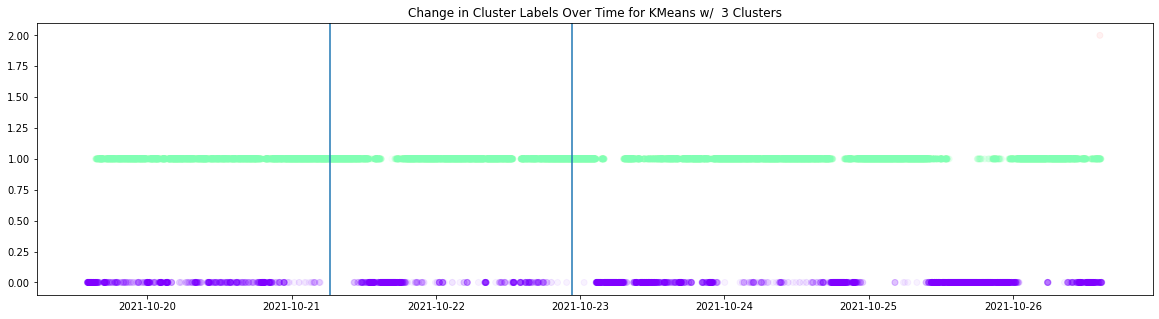

In [305]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_001[0], c = predicted_cluster_labels_001[0], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for KMeans w/  {len(np.unique(predicted_cluster_labels_001[0]))} Clusters")

plt.axvline(x=sz_times_001[0])
plt.axvline(x=sz_times_001[1])



plt.show()

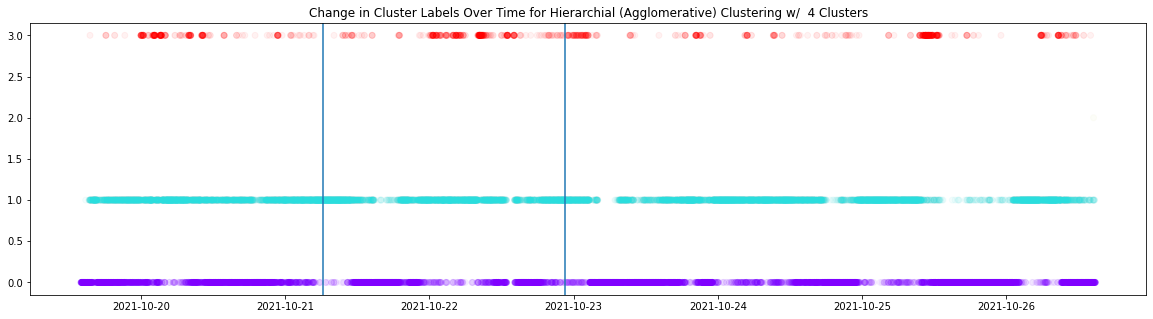

In [306]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_001[1], c = predicted_cluster_labels_001[1], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Hierarchial (Agglomerative) Clustering w/  {len(np.unique(predicted_cluster_labels_001[1]))} Clusters")

plt.axvline(x=sz_times_001[0])
plt.axvline(x=sz_times_001[1])



plt.show()

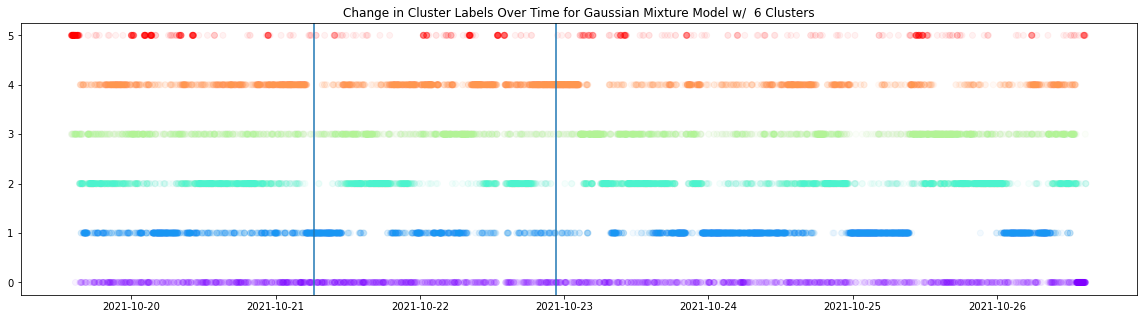

In [307]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_001[2], c = predicted_cluster_labels_001[2], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Gaussian Mixture Model w/  {len(np.unique(predicted_cluster_labels_001[2]))} Clusters")

plt.axvline(x=sz_times_001[0])
plt.axvline(x=sz_times_001[1])



plt.show()

__________________
__________________

# LB3_002

__________________
__________________

# *** KMeans - LB3_002

In [308]:
# final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']

kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans5 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans6 = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans7 = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans8 = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans9 = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans10 = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans11 = KMeans(n_clusters=11, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans12 = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans13 = KMeans(n_clusters=13, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans14 = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans15 = KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=300, random_state=0)

y_pred2 = kmeans2.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred3 = kmeans3.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred4 = kmeans4.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred5 = kmeans5.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred6 = kmeans6.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred7 = kmeans7.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred8 = kmeans8.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred9 = kmeans9.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred10 = kmeans10.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred11 = kmeans11.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred12 = kmeans12.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred13 = kmeans13.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred14 = kmeans14.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
y_pred15 = kmeans15.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])

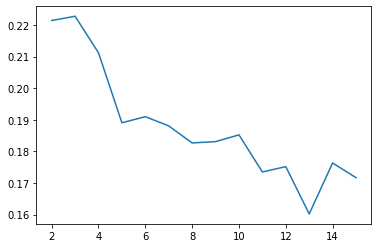

In [309]:
sil_score2 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans2.labels_)
sil_score3 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans3.labels_)
sil_score4 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans4.labels_)
sil_score5 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans5.labels_)
sil_score6 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans6.labels_)
sil_score7 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans7.labels_)
sil_score8 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans8.labels_)
sil_score9 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans9.labels_)
sil_score10 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans10.labels_)
sil_score11 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans11.labels_)
sil_score12 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans12.labels_)
sil_score13 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans13.labels_)
sil_score14 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans14.labels_)
sil_score15 = silhouette_score(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], kmeans15.labels_)


num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
all_sil_scores = [sil_score2, sil_score3, sil_score4, sil_score5, sil_score6, sil_score7, sil_score8, sil_score9, sil_score10, 
sil_score11, sil_score12, sil_score13, sil_score14, sil_score15]

plt.plot(num_clusters, all_sil_scores)


plt.show()

### --> optimal number of clusters seems to be 3

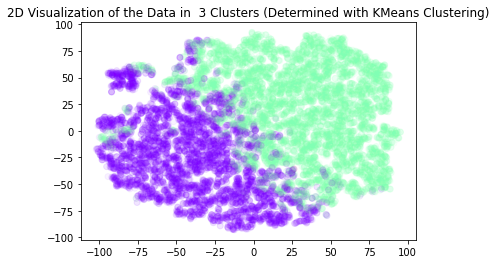

In [310]:

plt.scatter(featSet_002_2D_plot[0], featSet_002_2D_plot[1], c = kmeans3.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(kmeans3.labels_))} Clusters (Determined with KMeans Clustering)")



plt.show()


______
______

# *** Hierarchial Agglomerative Clustering - LB3_002

- likely the best methods for testing for similarity are:
    - Group Average
    - Ward's Method
    - distance between centroids

... ... 

- good way to handle noise/outliers in the data:
    - use a threshold to determine the termination criterion (ensuring to not generate clusters that are too small)

In [311]:
from sklearn.cluster import AgglomerativeClustering

agg_hier_clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])     
# defaults to result with ONE final cluster...



- let's check the dendrogram in order to find the optimal number of clusters...

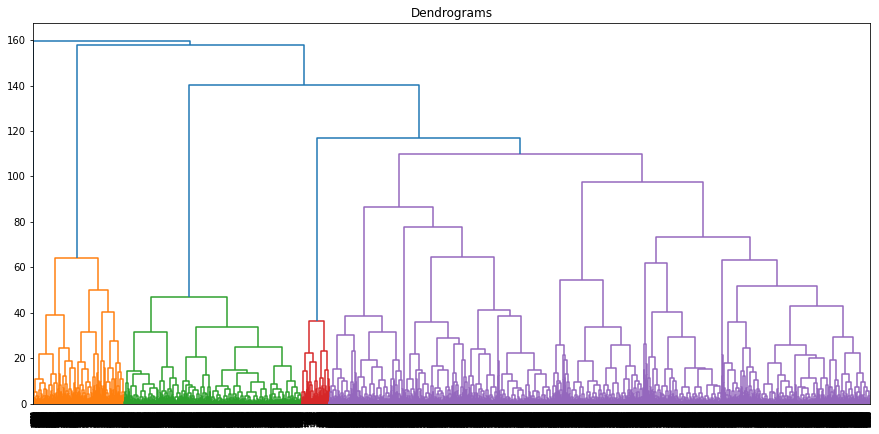

In [312]:
import scipy.cluster.hierarchy as shc 
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(15,7))
pyplot.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'], method='ward'))


plt.show()

In [313]:
# search for unique colors in the color list for the dendrogram...

unique_colors = set(dend['color_list'])
print(unique_colors)

optimal_num_clusters = len(unique_colors) - 1

optimal_num_clusters

{'C2', 'C0', 'C4', 'C1', 'C3'}


4

--> optimal number of clusters seems to be ___ (although one of those clusters seems to be very small, and is likely just noise...)

In [314]:
agglomerative_clustering_4 = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')   
# agglomerative_clustering_3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')   # defaults to result with ONE final cluster...


# cluster the data:
agglomerative_clustering_4.fit_predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...
# agglomerative_clustering_3.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...

array([0, 0, 0, ..., 0, 2, 2])

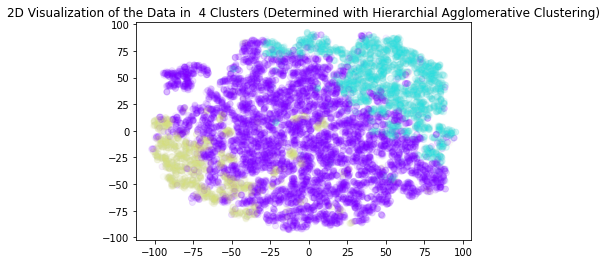

In [315]:
plt.scatter(featSet_002_2D_plot[0], featSet_002_2D_plot[1], c = agglomerative_clustering_4.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(agglomerative_clustering_4.labels_))} Clusters (Determined with Hierarchial Agglomerative Clustering)")



plt.show()

_______
_______

# *** Gaussian Mixture Models - LB3_002

- similar to KMeans, but better...
- unlike KMeans, this uses SOFT cluster assignments 
    - estimating probability of it belonging to each cluster
    - then, during the maximization step, each cluster is updated using ALL instances, with each instance weighted by the estimated probability that it belongs to said cluster  
- this model finds more complex patterns in the data, is not as simple, and results in very different clustering results
    - finds more complex & not so simple patterns in data, due to its soft clustering, with not such rigid divisions between clusters (which is the case for KMeans); clustersd can even overlap a bit

In [316]:
from sklearn.mixture import GaussianMixture

# n_init = number of times it runs in order to make sure it converges to good solutions (set to 10, or possibly more...)

# create different Gaussian Mixture models, with differnet number of clusters...
gm2 = GaussianMixture(n_components = 2, n_init = 10)    # init_params = 'k-means++'
gm3 = GaussianMixture(n_components = 3, n_init = 10)    # init_params = 'k-means++'
gm4 = GaussianMixture(n_components = 4, n_init = 10)    # init_params = 'k-means++'    
gm5 = GaussianMixture(n_components = 5, n_init = 10)    # init_params = 'k-means++'    
gm6 = GaussianMixture(n_components = 6, n_init = 10)    # init_params = 'k-means++'
gm7 = GaussianMixture(n_components = 7, n_init = 10)    # init_params = 'k-means++'
gm8 = GaussianMixture(n_components = 8, n_init = 10)    # init_params = 'k-means++'    
gm9 = GaussianMixture(n_components = 9, n_init = 10)    # init_params = 'k-means++'  
gm10 = GaussianMixture(n_components = 10, n_init = 10)    # init_params = 'k-means++'      
gm11 = GaussianMixture(n_components = 11, n_init = 10)    # init_params = 'k-means++'      
gm12 = GaussianMixture(n_components = 12, n_init = 10)    # init_params = 'k-means++'      
gm13 = GaussianMixture(n_components = 13, n_init = 10)    # init_params = 'k-means++'      
gm14 = GaussianMixture(n_components = 14, n_init = 10)    # init_params = 'k-means++'      
gm15 = GaussianMixture(n_components = 15, n_init = 10)    # init_params = 'k-means++'      


### FIT TO EACH OF THE CREATED GAUSSIAN MIXTURE MODELS:

gm2.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm3.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm4.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm5.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm6.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm7.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm8.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm9.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm10.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm11.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm12.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm13.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm14.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm15.fit(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])



GaussianMixture(n_components=15, n_init=10)

In [317]:
gm2_clusters = gm2.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm3_clusters = gm3.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm4_clusters = gm4.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm5_clusters = gm5.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm6_clusters = gm6.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm7_clusters = gm7.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm8_clusters = gm8.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm9_clusters = gm9.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm10_clusters = gm10.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm11_clusters = gm11.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm12_clusters = gm12.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm13_clusters = gm13.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm14_clusters = gm14.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])
gm15_clusters = gm15.predict(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])


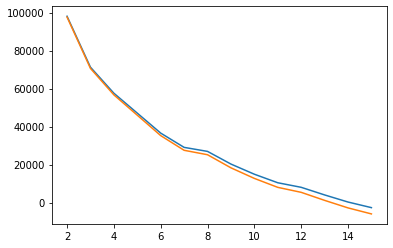

In [318]:
bic_scores = [gm2.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm3.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm4.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm5.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm6.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm7.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm8.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm9.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm10.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm11.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm12.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm13.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm14.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm15.bic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])]

aic_scores = [gm2.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm3.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm4.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']), 
gm5.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm6.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm7.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm8.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm9.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm10.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm11.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm12.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm13.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm14.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp']),
gm15.aic(final_normFeatSet_002_df.loc[:, final_normFeatSet_002_df.columns != 'timeStamp'])]

num_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(num_clusters, bic_scores)
plt.plot(num_clusters, aic_scores)

plt.show()

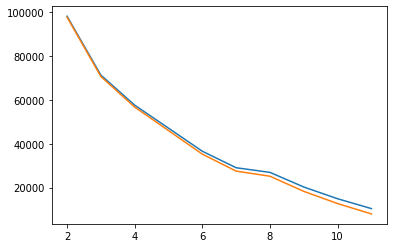

In [319]:
plt.plot(num_clusters[:10], bic_scores[:10])
plt.plot(num_clusters[:10], aic_scores[:10])

plt.show()


### --> *** look for where the gradient of the BIC scores become almost constant (plateaus) & choose the number of clusters right before it plateaus

In [320]:
array_bic = np.array(bic_scores)
array_aic = np.array(aic_scores)

gradient_bic = np.gradient(array_bic)
gradient_aic = np.gradient(array_aic)



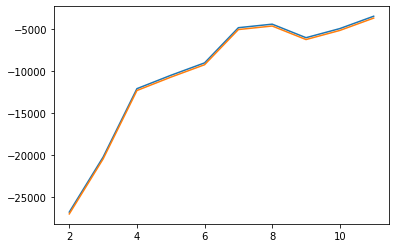

In [321]:
plt.plot(num_clusters[:10], gradient_bic[:10])
plt.plot(num_clusters[:10], gradient_aic[:10])

plt.show()

### at 7 the gradient becomes constant (plateau), i.e. there is no much gain in increasing the number of clusters 

### --> suggests to use 6 as the optimal number of clusters (one less than where the gradient becomes constant)


https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4

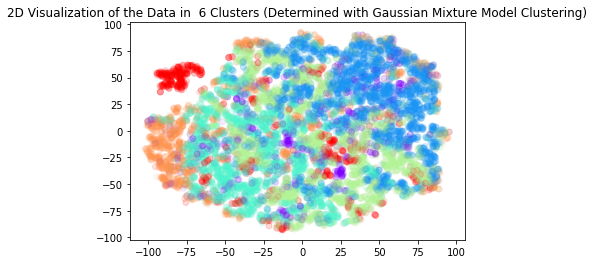

In [322]:
plt.scatter(featSet_002_2D_plot[0], featSet_002_2D_plot[1], c = gm6_clusters, cmap='rainbow', alpha = 0.08)
plt.title(f"2D Visualization of the Data in  {len(np.unique(gm6_clusters))} Clusters (Determined with Gaussian Mixture Model Clustering)")


plt.show()

______
______

# Comparing different clusters for similarity - LB3_002

* save the clusters' labels to variables...

In [323]:
from sklearn.metrics.cluster import adjusted_rand_score 

# saving clusters' labels to variables:
predicted_cluster_labels_002 = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]

# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_rand_scores = []

for idx in range(len(predicted_cluster_labels_002)):

    copy = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]
    
    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_rand_scores = []

    for other_labels in copy:
        temp_adj_rand_scores.append(adjusted_rand_score(comp_labels, other_labels))

    adj_rand_scores.append(temp_adj_rand_scores)


- the first list in 'adj_rand_scores' (adj_rand_scores[0]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[0])

- the second list in 'adj_rand_scores' (adj_rand_scores[1]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[1])

- etc...

In [324]:
adj_rand_scores

[[0.08513588296659157, 0.12552024206868265],
 [0.08513588296659157, 0.12196709270316784],
 [0.12552024206868265, 0.12196709270316784]]

... ... ... 
 
... ... ...

adjusted mutual info score

In [325]:
from sklearn.metrics.cluster import adjusted_mutual_info_score 


predicted_cluster_labels_002 = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]


# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_mutual_info_scores = []

for idx in range(len(predicted_cluster_labels_002)):

    copy = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]


    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_mutual_info_scores = []

    for other_labels in copy:
        temp_adj_mutual_info_scores.append(adjusted_mutual_info_score(comp_labels, other_labels))

    adj_mutual_info_scores.append(temp_adj_mutual_info_scores)

In [326]:
adj_mutual_info_scores

[[0.23752876801627681, 0.12160656268521838],
 [0.2375287680162793, 0.22899120125666803],
 [0.12160656268521737, 0.22899120125666997]]

### --> None of these 3 clustering results (KMeans3, agglomerative_4, & gm7) are similar to one another

_______
_______

# Analyzing Clusters Over Time - LB3_002

In [327]:
predicted_cluster_labels_002 = [kmeans3.labels_, agglomerative_clustering_4.labels_, gm6_clusters]

timeframe = final_normFeatSet_002_df['timeStamp']

# Commented out due to IRB...

# timeframe

In [328]:
# Commented out due to IRB...
    # Holds all patient IDs & their seizure events

# ieeg_metadata_converted_sz_times

* no seizure times for this patient...

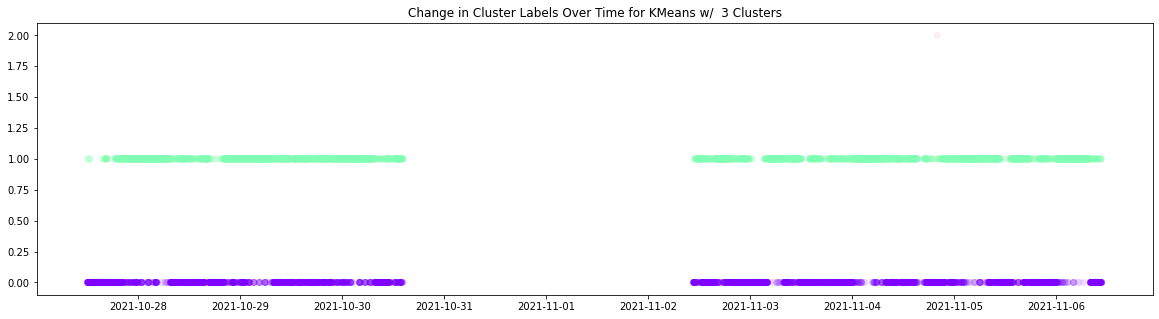

In [329]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_002[0], c = predicted_cluster_labels_002[0], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for KMeans w/  {len(np.unique(predicted_cluster_labels_002[0]))} Clusters")




plt.show()

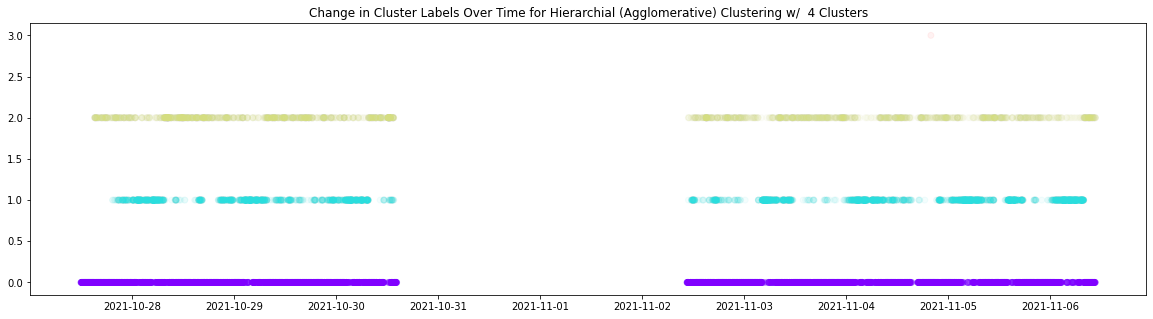

In [330]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_002[1], c = predicted_cluster_labels_002[1], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Hierarchial (Agglomerative) Clustering w/  {len(np.unique(predicted_cluster_labels_002[1]))} Clusters")




plt.show()

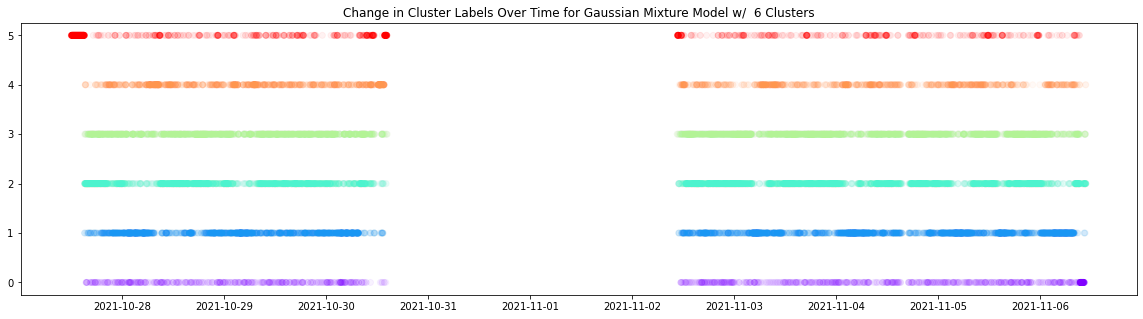

In [331]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_002[2], c = predicted_cluster_labels_002[2], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Gaussian Mixture Model w/  {len(np.unique(predicted_cluster_labels_002[2]))} Clusters")



plt.show()

__________________
__________________

# LB3_004

__________________
__________________

# *** KMeans - LB3_004

In [332]:
# final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']

kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans5 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans6 = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans7 = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans8 = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans9 = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans10 = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans11 = KMeans(n_clusters=11, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans12 = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans13 = KMeans(n_clusters=13, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans14 = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans15 = KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=300, random_state=0)

y_pred2 = kmeans2.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred3 = kmeans3.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred4 = kmeans4.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred5 = kmeans5.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred6 = kmeans6.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred7 = kmeans7.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred8 = kmeans8.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred9 = kmeans9.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred10 = kmeans10.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred11 = kmeans11.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred12 = kmeans12.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred13 = kmeans13.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred14 = kmeans14.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
y_pred15 = kmeans15.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])

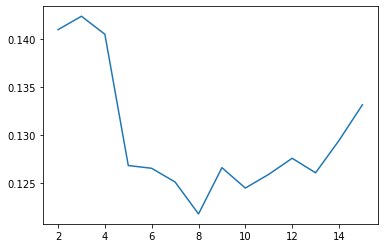

In [333]:
sil_score2 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans2.labels_)
sil_score3 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans3.labels_)
sil_score4 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans4.labels_)
sil_score5 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans5.labels_)
sil_score6 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans6.labels_)
sil_score7 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans7.labels_)
sil_score8 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans8.labels_)
sil_score9 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans9.labels_)
sil_score10 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans10.labels_)
sil_score11 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans11.labels_)
sil_score12 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans12.labels_)
sil_score13 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans13.labels_)
sil_score14 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans14.labels_)
sil_score15 = silhouette_score(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], kmeans15.labels_)


num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
all_sil_scores = [sil_score2, sil_score3, sil_score4, sil_score5, sil_score6, sil_score7, sil_score8, sil_score9, sil_score10, 
sil_score11, sil_score12, sil_score13, sil_score14, sil_score15]

plt.plot(num_clusters, all_sil_scores)


plt.show()

### --> optimal number of clusters seems to be 3

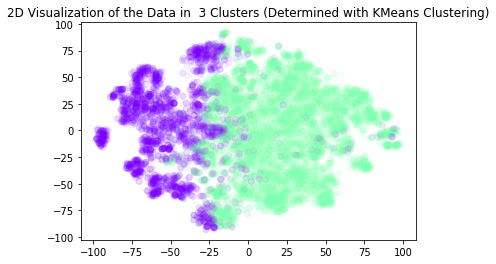

In [334]:

plt.scatter(featSet_004_2D_plot[0], featSet_004_2D_plot[1], c = kmeans3.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(kmeans3.labels_))} Clusters (Determined with KMeans Clustering)")



plt.show()


______
______

# *** Hierarchial Agglomerative Clustering - LB3_004

- likely the best methods for testing for similarity are:
    - Group Average
    - Ward's Method
    - distance between centroids

... ... 

- good way to handle noise/outliers in the data:
    - use a threshold to determine the termination criterion (ensuring to not generate clusters that are too small)

In [335]:
from sklearn.cluster import AgglomerativeClustering

agg_hier_clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])     
# defaults to result with ONE final cluster...



- let's check the dendrogram in order to find the optimal number of clusters...

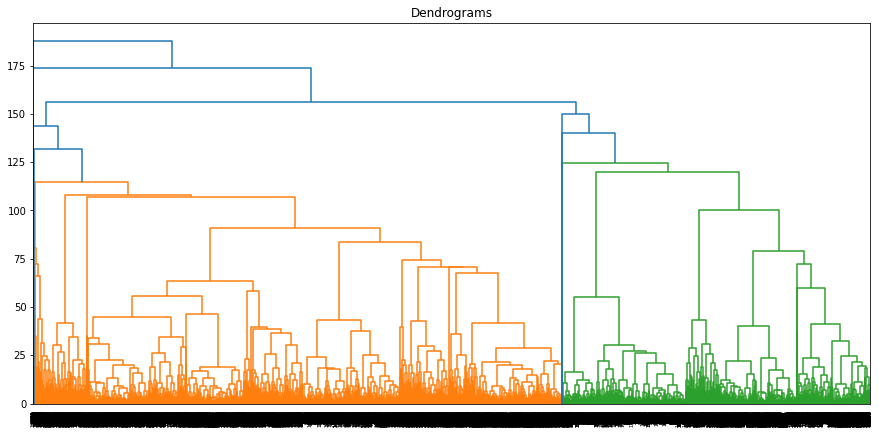

In [336]:
import scipy.cluster.hierarchy as shc 
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(15,7))
pyplot.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'], method='ward'))


plt.show()

In [337]:
# search for unique colors in the color list for the dendrogram...

unique_colors = set(dend['color_list'])
print(unique_colors)

optimal_num_clusters = len(unique_colors) - 1

optimal_num_clusters

{'C0', 'C1', 'C2'}


2

--> optimal number of clusters seems to be ___ (although one of those clusters seems to be very small, and is likely just noise...)

In [338]:
agglomerative_clustering_2 = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')   
# agglomerative_clustering_3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')   # defaults to result with ONE final cluster...


# cluster the data:
agglomerative_clustering_2.fit_predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...
# agglomerative_clustering_3.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...

array([0, 0, 0, ..., 0, 0, 0])

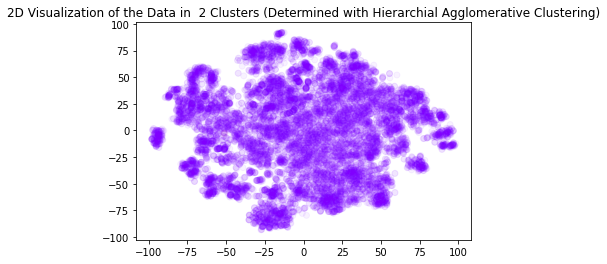

In [339]:
plt.scatter(featSet_004_2D_plot[0], featSet_004_2D_plot[1], c = agglomerative_clustering_2.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(agglomerative_clustering_2.labels_))} Clusters (Determined with Hierarchial Agglomerative Clustering)")



plt.show()

_______
_______

# *** Gaussian Mixture Models - LB3_004

- similar to KMeans, but better...
- unlike KMeans, this uses SOFT cluster assignments 
    - estimating probability of it belonging to each cluster
    - then, during the maximization step, each cluster is updated using ALL instances, with each instance weighted by the estimated probability that it belongs to said cluster  
- this model finds more complex patterns in the data, is not as simple, and results in very different clustering results
    - finds more complex & not so simple patterns in data, due to its soft clustering, with not such rigid divisions between clusters (which is the case for KMeans); clustersd can even overlap a bit

In [340]:
from sklearn.mixture import GaussianMixture

# n_init = number of times it runs in order to make sure it converges to good solutions (set to 10, or possibly more...)

# create different Gaussian Mixture models, with differnet number of clusters...
gm2 = GaussianMixture(n_components = 2, n_init = 10)    # init_params = 'k-means++'
gm3 = GaussianMixture(n_components = 3, n_init = 10)    # init_params = 'k-means++'
gm4 = GaussianMixture(n_components = 4, n_init = 10)    # init_params = 'k-means++'    
gm5 = GaussianMixture(n_components = 5, n_init = 10)    # init_params = 'k-means++'    
gm6 = GaussianMixture(n_components = 6, n_init = 10)    # init_params = 'k-means++'
gm7 = GaussianMixture(n_components = 7, n_init = 10)    # init_params = 'k-means++'
gm8 = GaussianMixture(n_components = 8, n_init = 10)    # init_params = 'k-means++'    
gm9 = GaussianMixture(n_components = 9, n_init = 10)    # init_params = 'k-means++'  
gm10 = GaussianMixture(n_components = 10, n_init = 10)    # init_params = 'k-means++'      
gm11 = GaussianMixture(n_components = 11, n_init = 10)    # init_params = 'k-means++'      
gm12 = GaussianMixture(n_components = 12, n_init = 10)    # init_params = 'k-means++'      
gm13 = GaussianMixture(n_components = 13, n_init = 10)    # init_params = 'k-means++'      
gm14 = GaussianMixture(n_components = 14, n_init = 10)    # init_params = 'k-means++'      
gm15 = GaussianMixture(n_components = 15, n_init = 10)    # init_params = 'k-means++'      


### FIT TO EACH OF THE CREATED GAUSSIAN MIXTURE MODELS:

gm2.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm3.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm4.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm5.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm6.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm7.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm8.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm9.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm10.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm11.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm12.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm13.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm14.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm15.fit(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])



GaussianMixture(n_components=15, n_init=10)

In [341]:
gm2_clusters = gm2.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm3_clusters = gm3.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm4_clusters = gm4.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm5_clusters = gm5.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm6_clusters = gm6.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm7_clusters = gm7.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm8_clusters = gm8.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm9_clusters = gm9.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm10_clusters = gm10.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm11_clusters = gm11.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm12_clusters = gm12.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm13_clusters = gm13.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm14_clusters = gm14.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])
gm15_clusters = gm15.predict(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])


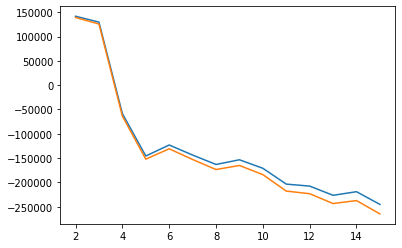

In [342]:
bic_scores = [gm2.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm3.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm4.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm5.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm6.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm7.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm8.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm9.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm10.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm11.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm12.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm13.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm14.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm15.bic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])]

aic_scores = [gm2.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm3.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm4.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']), 
gm5.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm6.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm7.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm8.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm9.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm10.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm11.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm12.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm13.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm14.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp']),
gm15.aic(final_normFeatSet_004_df.loc[:, final_normFeatSet_004_df.columns != 'timeStamp'])]

num_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(num_clusters, bic_scores)
plt.plot(num_clusters, aic_scores)

plt.show()

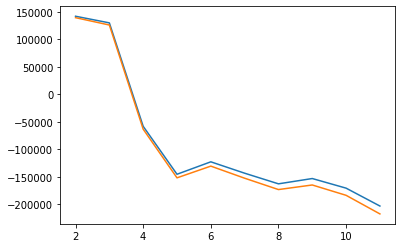

In [343]:
plt.plot(num_clusters[:10], bic_scores[:10])
plt.plot(num_clusters[:10], aic_scores[:10])

plt.show()

### --> local minimum at 5

### --> *** look for where the gradient of the BIC scores become almost constant (plateaus) & choose the number of clusters right before it plateaus

In [344]:
array_bic = np.array(bic_scores)
array_aic = np.array(aic_scores)

gradient_bic = np.gradient(array_bic)
gradient_aic = np.gradient(array_aic)



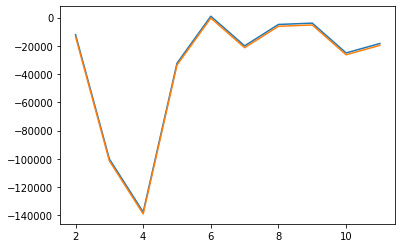

In [345]:
plt.plot(num_clusters[:10], gradient_bic[:10])
plt.plot(num_clusters[:10], gradient_aic[:10])

plt.show()

### 5 seems to be optimal number of clusters

- plateaus at 6, so therefore 5 can be interpreted as the optimal number of clusters (using same method as done previously)

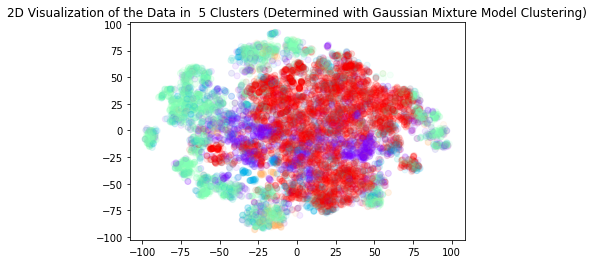

In [346]:
plt.scatter(featSet_004_2D_plot[0], featSet_004_2D_plot[1], c = gm5_clusters, cmap='rainbow', alpha = 0.08)
plt.title(f"2D Visualization of the Data in  {len(np.unique(gm5_clusters))} Clusters (Determined with Gaussian Mixture Model Clustering)")


plt.show()

______
______

# Comparing different clusters for similarity - LB3_004

* save the clusters' labels to variables...

In [347]:
from sklearn.metrics.cluster import adjusted_rand_score 

# saving clusters' labels to variables:
predicted_cluster_labels_004 = [kmeans3.labels_, agglomerative_clustering_2.labels_, gm5_clusters]

# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_rand_scores = []

for idx in range(len(predicted_cluster_labels_004)):

    copy = [kmeans3.labels_, agglomerative_clustering_2.labels_, gm5_clusters]

    
    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_rand_scores = []

    for other_labels in copy:
        temp_adj_rand_scores.append(adjusted_rand_score(comp_labels, other_labels))

    adj_rand_scores.append(temp_adj_rand_scores)


- the first list in 'adj_rand_scores' (adj_rand_scores[0]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[0])

- the second list in 'adj_rand_scores' (adj_rand_scores[1]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[1])

- etc...

In [348]:
adj_rand_scores

[[0.0003623811770775367, 0.22747824922514112],
 [0.0003623811770775367, 0.00010532016002490893],
 [0.22747824922514112, 0.00010532016002490893]]

... ... ... 
 
... ... ...

adjusted mutual info score

In [349]:
from sklearn.metrics.cluster import adjusted_mutual_info_score 


predicted_cluster_labels_004 = [kmeans3.labels_, agglomerative_clustering_2.labels_, gm5_clusters]


# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_mutual_info_scores = []

for idx in range(len(predicted_cluster_labels_004)):

    copy = [kmeans3.labels_, agglomerative_clustering_2.labels_, gm5_clusters]

    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_mutual_info_scores = []

    for other_labels in copy:
        temp_adj_mutual_info_scores.append(adjusted_mutual_info_score(comp_labels, other_labels))

    adj_mutual_info_scores.append(temp_adj_mutual_info_scores)

In [350]:
adj_mutual_info_scores

[[0.0021554499701116536, 0.17637243098790412],
 [0.0021554499701116536, 0.00023339949651933256],
 [0.17637243098790265, 0.000233399496520495]]

### --> None of these 3 clustering results (KMeans3, agglomerative_2, & gm10) are similar to one another

_______
_______

# Analyzing Clusters Over Time - LB3_004

In [351]:
predicted_cluster_labels_004 = [kmeans3.labels_, agglomerative_clustering_2.labels_, gm5_clusters]

timeframe = final_normFeatSet_004_df['timeStamp']

# Commented out due to IRB...

# timeframe

In [352]:
# Commented out due to IRB...
    # Contains all patient IDs & their seizure events

# ieeg_metadata_converted_sz_times

In [353]:
import datetime

sz_times_004 = [ieeg_metadata_converted_sz_times['Seizure events (real time)'][4], ieeg_metadata_converted_sz_times['Seizure events (real time)'][5], ieeg_metadata_converted_sz_times['Seizure events (real time)'][6],
ieeg_metadata_converted_sz_times['Seizure events (real time)'][7], ieeg_metadata_converted_sz_times['Seizure events (real time)'][8]]

sz_times_004[0] = datetime.datetime.strptime(sz_times_004[0], '%Y-%m-%d %H:%M:%S.%f-05:00')
sz_times_004[1] = datetime.datetime.strptime(sz_times_004[1], '%Y-%m-%d %H:%M:%S.%f-05:00')
sz_times_004[2] = datetime.datetime.strptime(sz_times_004[2], '%Y-%m-%d %H:%M:%S.%f-05:00')
sz_times_004[3] = datetime.datetime.strptime(sz_times_004[3], '%Y-%m-%d %H:%M:%S.%f-05:00')
sz_times_004[4] = datetime.datetime.strptime(sz_times_004[4], '%Y-%m-%d %H:%M:%S.%f-05:00')


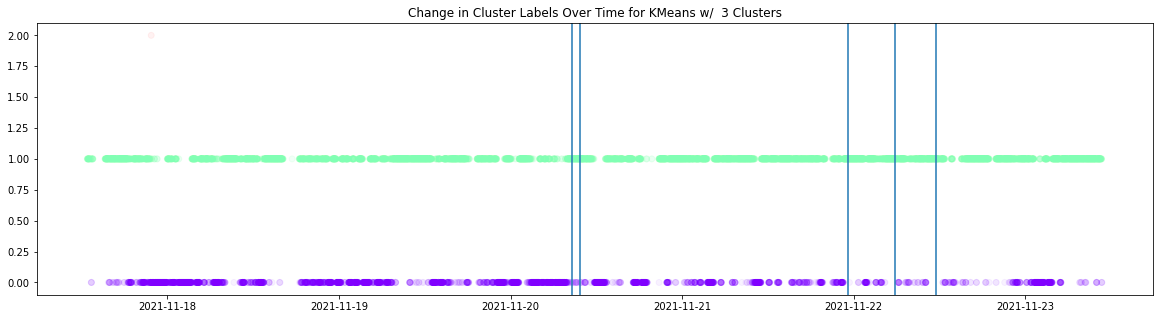

In [354]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_004[0], c = predicted_cluster_labels_004[0], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for KMeans w/  {len(np.unique(predicted_cluster_labels_004[0]))} Clusters")

plt.axvline(x=sz_times_004[0])
plt.axvline(x=sz_times_004[1])
plt.axvline(x=sz_times_004[2])
plt.axvline(x=sz_times_004[3])
plt.axvline(x=sz_times_004[4])



plt.show()

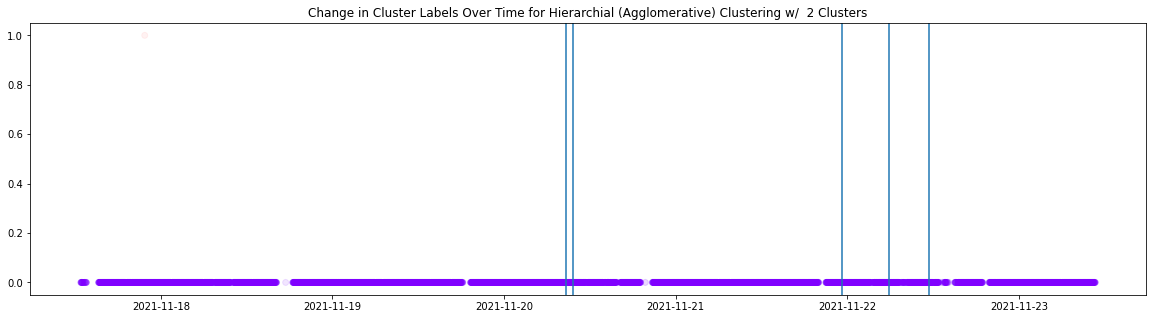

In [355]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_004[1], c = predicted_cluster_labels_004[1], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Hierarchial (Agglomerative) Clustering w/  {len(np.unique(predicted_cluster_labels_004[1]))} Clusters")

plt.axvline(x=sz_times_004[0])
plt.axvline(x=sz_times_004[1])
plt.axvline(x=sz_times_004[2])
plt.axvline(x=sz_times_004[3])
plt.axvline(x=sz_times_004[4])



plt.show()

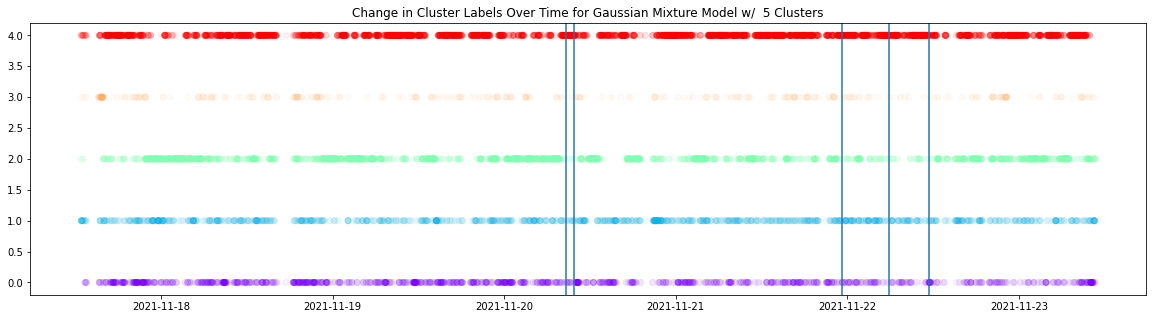

In [356]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_004[2], c = predicted_cluster_labels_004[2], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Gaussian Mixture Model w/  {len(np.unique(predicted_cluster_labels_004[2]))} Clusters")

plt.axvline(x=sz_times_004[0])
plt.axvline(x=sz_times_004[1])
plt.axvline(x=sz_times_004[2])
plt.axvline(x=sz_times_004[3])
plt.axvline(x=sz_times_004[4])



plt.show()

__________________
__________________

# LB3_005

__________________
__________________

# *** KMeans - LB3_005

In [357]:
# final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp']

kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans5 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans6 = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans7 = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans8 = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans9 = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans10 = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans11 = KMeans(n_clusters=11, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans12 = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans13 = KMeans(n_clusters=13, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans14 = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans15 = KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=300, random_state=0)

y_pred2 = kmeans2.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred3 = kmeans3.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred4 = kmeans4.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred5 = kmeans5.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred6 = kmeans6.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred7 = kmeans7.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred8 = kmeans8.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred9 = kmeans9.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred10 = kmeans10.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred11 = kmeans11.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred12 = kmeans12.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred13 = kmeans13.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred14 = kmeans14.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
y_pred15 = kmeans15.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])

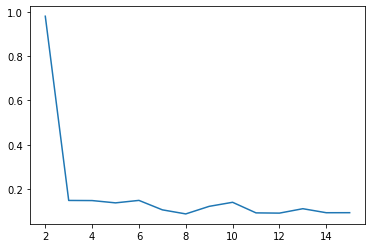

In [358]:
sil_score2 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans2.labels_)
sil_score3 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans3.labels_)
sil_score4 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans4.labels_)
sil_score5 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans5.labels_)
sil_score6 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans6.labels_)
sil_score7 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans7.labels_)
sil_score8 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans8.labels_)
sil_score9 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans9.labels_)
sil_score10 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans10.labels_)
sil_score11 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans11.labels_)
sil_score12 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans12.labels_)
sil_score13 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans13.labels_)
sil_score14 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans14.labels_)
sil_score15 = silhouette_score(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], kmeans15.labels_)


num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
all_sil_scores = [sil_score2, sil_score3, sil_score4, sil_score5, sil_score6, sil_score7, sil_score8, sil_score9, sil_score10, 
sil_score11, sil_score12, sil_score13, sil_score14, sil_score15]

plt.plot(num_clusters, all_sil_scores)


plt.show()

### --> optimal number of clusters seems to be 2

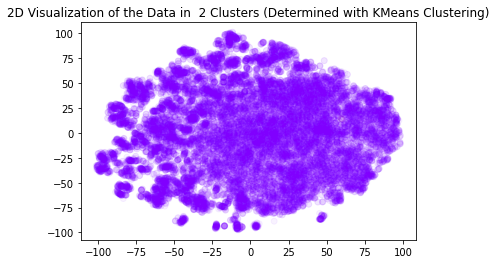

In [359]:

plt.scatter(featSet_005_2D_plot[0], featSet_005_2D_plot[1], c = kmeans2.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(kmeans2.labels_))} Clusters (Determined with KMeans Clustering)")



plt.show()


______
______

# *** Hierarchial Agglomerative Clustering - LB3_005

- likely the best methods for testing for similarity are:
    - Group Average
    - Ward's Method
    - distance between centroids

... ... 

- good way to handle noise/outliers in the data:
    - use a threshold to determine the termination criterion (ensuring to not generate clusters that are too small)

In [360]:
from sklearn.cluster import AgglomerativeClustering

agg_hier_clustering = AgglomerativeClustering(affinity='euclidean', linkage='ward').fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])     
# defaults to result with ONE final cluster...



- let's check the dendrogram in order to find the optimal number of clusters...

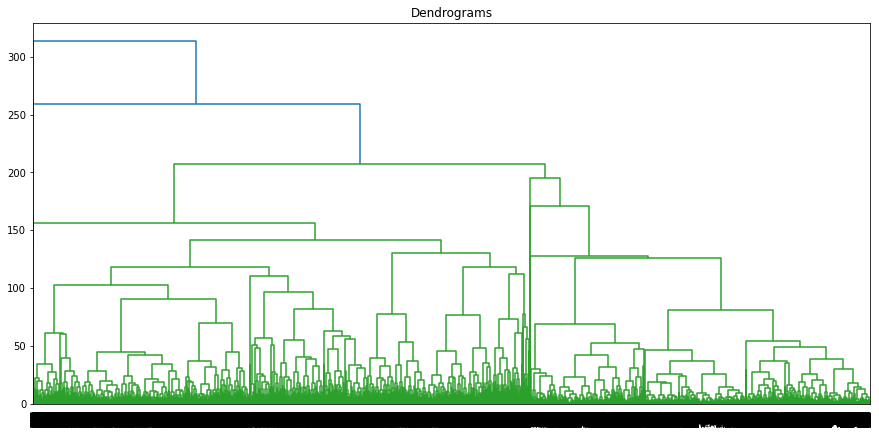

In [361]:
import scipy.cluster.hierarchy as shc 
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(15,7))
pyplot.title('Dendrograms')
dend = shc.dendrogram(shc.linkage(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'], method='ward'))


plt.show()

In [362]:
# search for unique colors in the color list for the dendrogram...

unique_colors = set(dend['color_list'])
print(unique_colors)

optimal_num_clusters = len(unique_colors) - 1

optimal_num_clusters

{'C0', 'C1', 'C2'}


2

--> optimal number of clusters seems to be 2 (although one of those clusters seems to be very small, and is likely just noise...)

In [363]:
agglomerative_clustering_2 = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')   
# agglomerative_clustering_3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')   # defaults to result with ONE final cluster...


# cluster the data:
agglomerative_clustering_2.fit_predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...
# agglomerative_clustering_3.fit_predict(final_normFeatSet_001_df.loc[:, final_normFeatSet_001_df.columns != 'timeStamp'])     # defaults to result with ONE final cluster...

array([0, 0, 0, ..., 0, 0, 0])

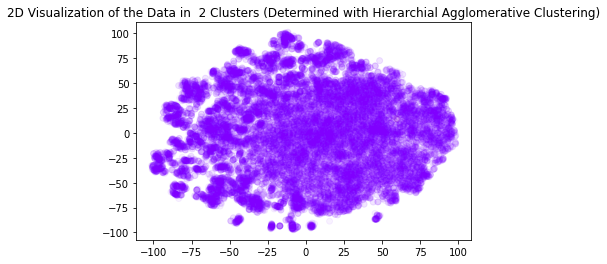

In [364]:
plt.scatter(featSet_005_2D_plot[0], featSet_005_2D_plot[1], c = agglomerative_clustering_2.labels_, cmap='rainbow', alpha = 0.05)
plt.title(f"2D Visualization of the Data in  {len(np.unique(agglomerative_clustering_2.labels_))} Clusters (Determined with Hierarchial Agglomerative Clustering)")



plt.show()

_______
_______

# *** Gaussian Mixture Models - LB3_005

- similar to KMeans, but better...
- unlike KMeans, this uses SOFT cluster assignments 
    - estimating probability of it belonging to each cluster
    - then, during the maximization step, each cluster is updated using ALL instances, with each instance weighted by the estimated probability that it belongs to said cluster  
- this model finds more complex patterns in the data, is not as simple, and results in very different clustering results
    - finds more complex & not so simple patterns in data, due to its soft clustering, with not such rigid divisions between clusters (which is the case for KMeans); clustersd can even overlap a bit

In [365]:
from sklearn.mixture import GaussianMixture

# n_init = number of times it runs in order to make sure it converges to good solutions (set to 10, or possibly more...)

# create different Gaussian Mixture models, with differnet number of clusters...
gm2 = GaussianMixture(n_components = 2, n_init = 10)    # init_params = 'k-means++'
gm3 = GaussianMixture(n_components = 3, n_init = 10)    # init_params = 'k-means++'
gm4 = GaussianMixture(n_components = 4, n_init = 10)    # init_params = 'k-means++'    
gm5 = GaussianMixture(n_components = 5, n_init = 10)    # init_params = 'k-means++'    
gm6 = GaussianMixture(n_components = 6, n_init = 10)    # init_params = 'k-means++'
gm7 = GaussianMixture(n_components = 7, n_init = 10)    # init_params = 'k-means++'
gm8 = GaussianMixture(n_components = 8, n_init = 10)    # init_params = 'k-means++'    
gm9 = GaussianMixture(n_components = 9, n_init = 10)    # init_params = 'k-means++'  
gm10 = GaussianMixture(n_components = 10, n_init = 10)    # init_params = 'k-means++'      
gm11 = GaussianMixture(n_components = 11, n_init = 10)    # init_params = 'k-means++'      
gm12 = GaussianMixture(n_components = 12, n_init = 10)    # init_params = 'k-means++'      
gm13 = GaussianMixture(n_components = 13, n_init = 10)    # init_params = 'k-means++'      
gm14 = GaussianMixture(n_components = 14, n_init = 10)    # init_params = 'k-means++'      
gm15 = GaussianMixture(n_components = 15, n_init = 10)    # init_params = 'k-means++'      


### FIT TO EACH OF THE CREATED GAUSSIAN MIXTURE MODELS:

gm2.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm3.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm4.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm5.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm6.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm7.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm8.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm9.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm10.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm11.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm12.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm13.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm14.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm15.fit(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])



GaussianMixture(n_components=15, n_init=10)

In [366]:
gm2_clusters = gm2.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm3_clusters = gm3.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm4_clusters = gm4.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm5_clusters = gm5.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm6_clusters = gm6.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm7_clusters = gm7.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm8_clusters = gm8.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm9_clusters = gm9.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm10_clusters = gm10.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm11_clusters = gm11.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm12_clusters = gm12.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm13_clusters = gm13.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm14_clusters = gm14.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])
gm15_clusters = gm15.predict(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])


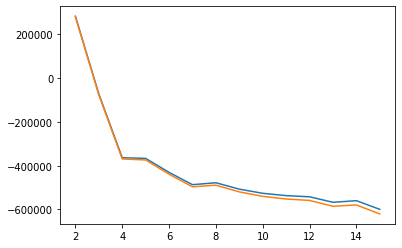

In [367]:
bic_scores = [gm2.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm3.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm4.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm5.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm6.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm7.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm8.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm9.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm10.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm11.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm12.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm13.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm14.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm15.bic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])]

aic_scores = [gm2.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm3.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm4.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']), 
gm5.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm6.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm7.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm8.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm9.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm10.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm11.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm12.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm13.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm14.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp']),
gm15.aic(final_normFeatSet_005_df.loc[:, final_normFeatSet_005_df.columns != 'timeStamp'])]

num_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(num_clusters, bic_scores)
plt.plot(num_clusters, aic_scores)

plt.show()

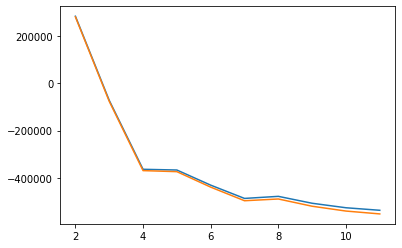

In [368]:
plt.plot(num_clusters[:10], bic_scores[:10])
plt.plot(num_clusters[:10], aic_scores[:10])

plt.show()


### --> *** look for where the gradient of the BIC scores become almost constant (plateaus) & choose the number of clusters right before it plateaus

In [369]:
array_bic = np.array(bic_scores)
array_aic = np.array(aic_scores)

gradient_bic = np.gradient(array_bic)
gradient_aic = np.gradient(array_aic)



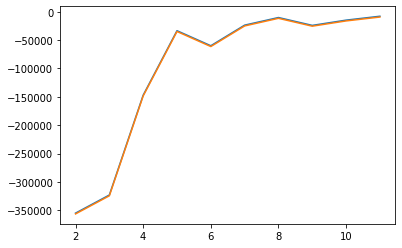

In [370]:
plt.plot(num_clusters[:10], gradient_bic[:10])
plt.plot(num_clusters[:10], gradient_aic[:10])

plt.show()

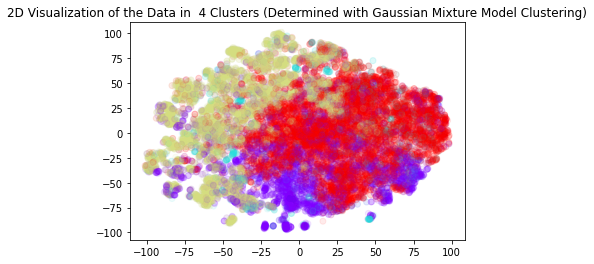

In [371]:
plt.scatter(featSet_005_2D_plot[0], featSet_005_2D_plot[1], c = gm4_clusters, cmap='rainbow', alpha = 0.08)
plt.title(f"2D Visualization of the Data in  {len(np.unique(gm4_clusters))} Clusters (Determined with Gaussian Mixture Model Clustering)")


plt.show()

______
______

# Comparing different clusters for similarity - LB3_005

* save the clusters' labels to variables...

In [372]:
from sklearn.metrics.cluster import adjusted_rand_score 

# saving clusters' labels to variables:
predicted_cluster_labels_005 = [kmeans2.labels_, agglomerative_clustering_2.labels_, gm4_clusters]

# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_rand_scores = []

for idx in range(len(predicted_cluster_labels_005)):

    copy = [kmeans2.labels_, agglomerative_clustering_2.labels_, gm4_clusters]
    
    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_rand_scores = []

    for other_labels in copy:
        temp_adj_rand_scores.append(adjusted_rand_score(comp_labels, other_labels))

    adj_rand_scores.append(temp_adj_rand_scores)


- the first list in 'adj_rand_scores' (adj_rand_scores[0]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[0])

- the second list in 'adj_rand_scores' (adj_rand_scores[1]) shows the comparison scores of all other clustering models to the first clustering model (predicted_cluster_labels_001[1])

- etc...

In [373]:
adj_rand_scores

[[1.0, 6.521594097832436e-05],
 [1.0, 6.521594097832436e-05],
 [6.521594097832436e-05, 6.521594097832436e-05]]

... ... ... 
 
... ... ...

adjusted mutual info score

In [374]:
from sklearn.metrics.cluster import adjusted_mutual_info_score 


predicted_cluster_labels_005 = [kmeans2.labels_, agglomerative_clustering_2.labels_, gm4_clusters]


# to contain the scores of all other models' labels compared to the labels of the particular model in the same index as shown above...
    # should end up having a length equal to the length of 'predicted_cluster_labels' (defined above)
adj_mutual_info_scores = []

for idx in range(len(predicted_cluster_labels_005)):

    copy = [kmeans2.labels_, agglomerative_clustering_2.labels_, gm4_clusters]


    comp_labels = copy.pop(idx)

    # 'copy' NOW does not include that specfic models cluster labels

    # temporary values specific for the loop below:
        # should have a length of 1 less than the length of 'predicted_cluster_labels'
    temp_adj_mutual_info_scores = []

    for other_labels in copy:
        temp_adj_mutual_info_scores.append(adjusted_mutual_info_score(comp_labels, other_labels))

    adj_mutual_info_scores.append(temp_adj_mutual_info_scores)

In [375]:
adj_mutual_info_scores

[[1.0, 0.00012812355684267663],
 [1.0, 0.00012812355684267663],
 [0.00012812355684406078, 0.00012812355684406078]]

### --> KMeans2 & Agglomerative_2 have the EXACT same clustering --> neglect the one from Agglomerative_2 clusterings

### --> None of these 3 clustering results (KMeans3, agglomerative_4, & gm6) are similar to one another

_______
_______

# Analyzing Clusters Over Time - LB3_005

In [378]:
predicted_cluster_labels_005 = [kmeans2.labels_, gm4_clusters]   # NOT including agglomerative clusterings

timeframe = final_normFeatSet_005_df['timeStamp']

# Commented out due to IRB...

# timeframe

In [379]:
# Commented out due to IRB...
    # Contains all patient IDs & their seizure events

# ieeg_metadata_converted_sz_times

In [380]:
import datetime

sz_times_005 = [ieeg_metadata_converted_sz_times['Seizure events (real time)'][9], ieeg_metadata_converted_sz_times['Seizure events (real time)'][10], ieeg_metadata_converted_sz_times['Seizure events (real time)'][11]]

sz_times_005[0] = datetime.datetime.strptime(sz_times_005[0], '%Y-%m-%d %H:%M:%S.%f-05:00')
sz_times_005[1] = datetime.datetime.strptime(sz_times_005[1], '%Y-%m-%d %H:%M:%S.%f-05:00')
sz_times_005[2] = datetime.datetime.strptime(sz_times_005[2], '%Y-%m-%d %H:%M:%S.%f-05:00')




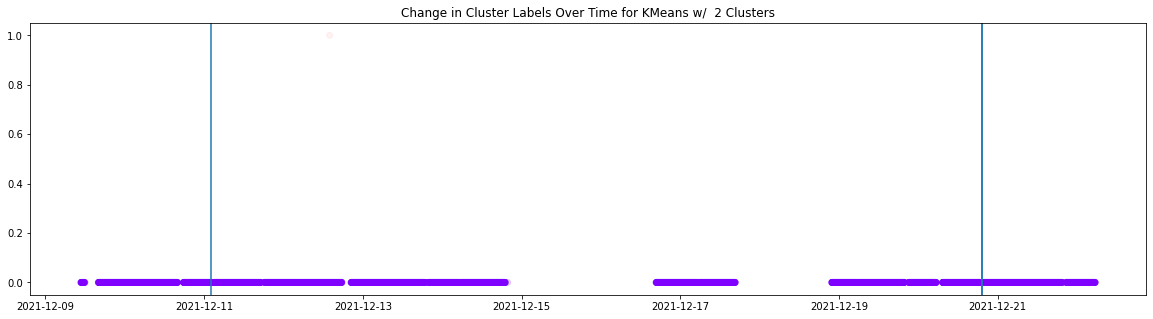

In [381]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_005[0], c = predicted_cluster_labels_005[0], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for KMeans w/  {len(np.unique(predicted_cluster_labels_005[0]))} Clusters")

plt.axvline(x=sz_times_005[0])
plt.axvline(x=sz_times_005[1])
plt.axvline(x=sz_times_005[2])


plt.show()

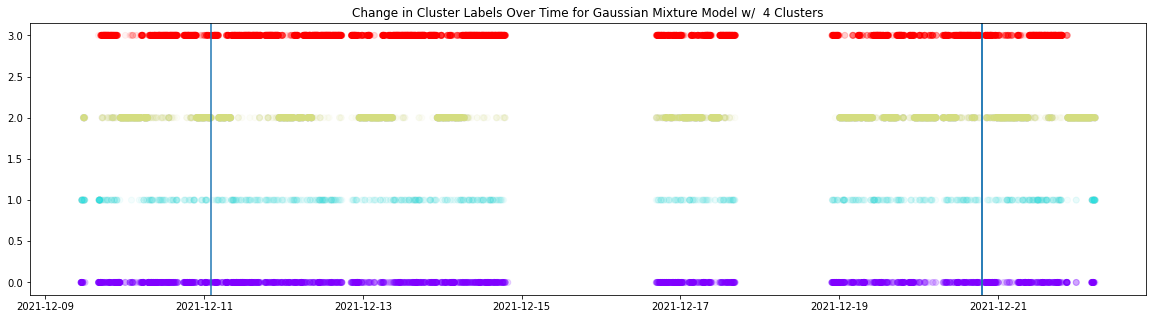

In [382]:
plt.figure(figsize=(20,5))


plt.scatter(timeframe, predicted_cluster_labels_005[1], c = predicted_cluster_labels_005[1], cmap='rainbow', alpha = 0.05)
plt.title(f"Change in Cluster Labels Over Time for Gaussian Mixture Model w/  {len(np.unique(predicted_cluster_labels_005[1]))} Clusters")

plt.axvline(x=sz_times_005[0])
plt.axvline(x=sz_times_005[1])
plt.axvline(x=sz_times_005[2])



plt.show()